# Gold Rate Analysis & Analytics 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 

## Import a Gold Rate 2019 for first Six months

In [2]:
df = pd.read_excel("./Gold rate 2019_6 months.xlsx")
df1 = pd.read_excel("./Gold rate 2019_6 months.xlsx", parse_dates=["Date"], index_col="Date")

In [95]:
df.shape

(181, 2)

In [96]:
df1.shape

(181, 1)

In [97]:
df.head()

,Date,Pure_Gold_Price
0,2019-01-01,3167
1,2019-01-02,3185
2,2019-01-03,3198
3,2019-01-04,3183
4,2019-01-05,3170


In [98]:
df1.head()

,Pure_Gold_Price
Date,
2019-01-01,3167
2019-01-02,3185
2019-01-03,3198
2019-01-04,3183
2019-01-05,3170


In [99]:
df.index

RangeIndex(start=0, stop=181, step=1)

In [100]:
df1.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', name='Date', length=181, freq=None)

In [101]:
df.columns

Index(['Date', 'Pure_Gold_Price'], dtype='object')

In [102]:
df1.columns

Index(['Pure_Gold_Price'], dtype='object')

In [103]:
#df["2019-01"].Pure_Gold_Price.mean()

In [104]:
df1["2019-01"].Pure_Gold_Price.mean()

3230.516129032258

In [105]:
df1["2019-01-08":"2019-01-16"]

,Pure_Gold_Price
Date,
2019-01-08,3183
2019-01-09,3197
2019-01-10,3223
2019-01-11,3219
2019-01-12,3223
2019-01-13,3223
2019-01-14,3235
2019-01-15,3238
2019-01-16,3249


In [106]:
df1["2019-01-08":"2019-01-16"].mean()

Pure_Gold_Price    3221.111111
dtype: float64

In [108]:
df1["2019-01-08":"2019-01-16"]

,Pure_Gold_Price
Date,
2019-01-08,3183
2019-01-09,3197
2019-01-10,3223
2019-01-11,3219
2019-01-12,3223
2019-01-13,3223
2019-01-14,3235
2019-01-15,3238
2019-01-16,3249


In [15]:
df1.Pure_Gold_Price.resample('M').mean()

Date
2019-01-31    3230.516129
2019-02-28    3328.321429
2019-03-31    3218.838710
2019-04-30    3179.833333
2019-05-31    3186.387097
2019-06-30    3325.200000
Freq: M, Name: Pure_Gold_Price, dtype: float64

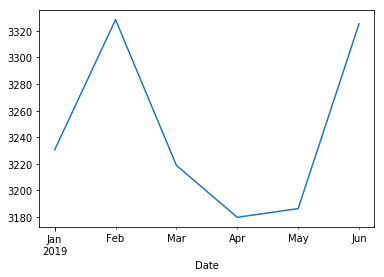

In [16]:
df1.Pure_Gold_Price.resample('M').mean().plot()

In [17]:
df1.Pure_Gold_Price.resample('W').mean()

Date
2019-01-06    3178.833333
2019-01-13    3208.285714
2019-01-20    3242.285714
2019-01-27    3246.428571
2019-02-03    3315.571429
2019-02-10    3317.857143
2019-02-17    3309.000000
2019-02-24    3351.000000
2019-03-03    3307.857143
2019-03-10    3230.000000
2019-03-17    3215.142857
2019-03-24    3206.857143
2019-03-31    3199.714286
2019-04-07    3170.428571
2019-04-14    3189.428571
2019-04-21    3167.714286
2019-04-28    3187.285714
2019-05-05    3171.714286
2019-05-12    3186.857143
2019-05-19    3212.428571
2019-05-26    3172.857143
2019-06-02    3202.857143
2019-06-09    3271.428571
2019-06-16    3285.428571
2019-06-23    3354.857143
2019-06-30    3416.571429
Freq: W-SUN, Name: Pure_Gold_Price, dtype: float64

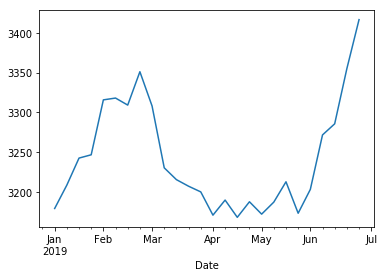

In [18]:
df1.Pure_Gold_Price.resample('W').mean().plot()

In [19]:
df1.Pure_Gold_Price.resample('Q').mean()

Date
2019-03-31    3256.922222
2019-06-30    3229.989011
Freq: Q-DEC, Name: Pure_Gold_Price, dtype: float64

In [20]:
rng = pd.date_range(start="01-01-2019",end="06-30-2019",freq='B')
rng
# df.set_index(rng,inplace=True)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-20',
               '2019-06-21', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28'],
              dtype='datetime64[ns]', length=129, freq='B')

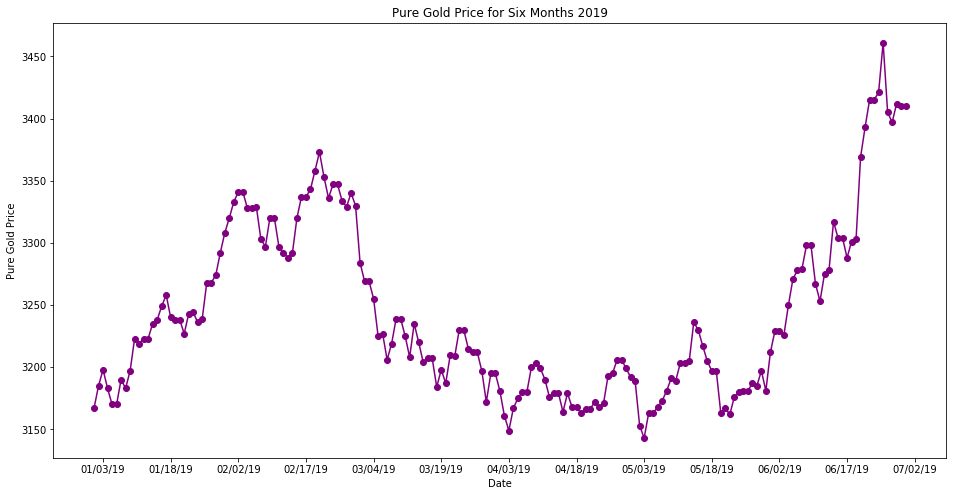

In [21]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(16,8))

# Add the x-axis and the y-axis to the plot
ax.plot(df1.index.values,
        df1['Pure_Gold_Price'], '-o',
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Pure Gold Price",
       title="Pure Gold Price for Six Months 2019")

# Clean up the x axis dates (reviewed in lesson 4)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
ax.xaxis.set_major_formatter(DateFormatter("%m/%d/%y"))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C2DD33978>]],
      dtype=object)

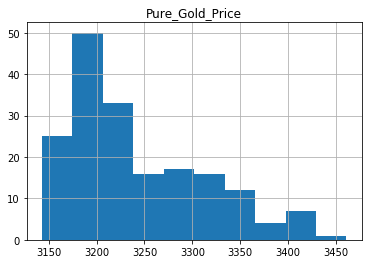

In [22]:
df.hist()

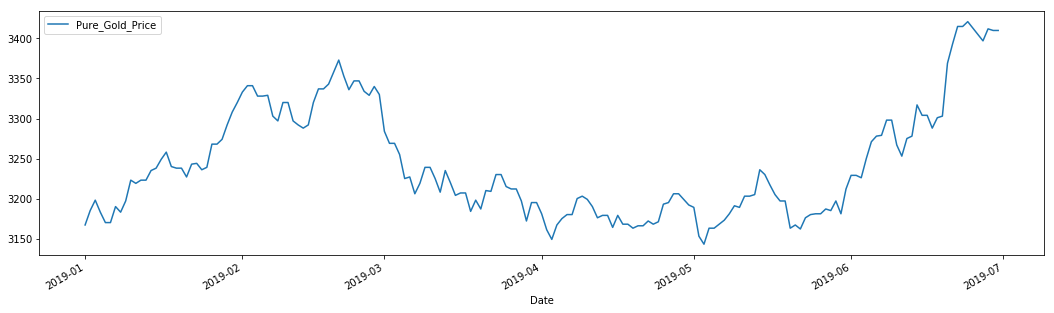

In [23]:
std_dev = 3
df1 = df1[(np.abs(stats.zscore(df1)) < float(std_dev)).all(axis=1)]
df1.plot(figsize=(18,5))

In [ ]:
# fig, ax = plt.subplots(figsize=(16, 8))
# df1.index = pd.to_datetime(df1.index, format="%Y-%m")
# ax.vlines(180, 3300, 3650, linestyle='--', color='r', label='Start of forecast');
# model = ARIMA(df1, order=(1,1,0))
# model_fit = model.fit()
# model_fit.predict(start=1, end=180, exog=None, dynamic=False)
# model_fit.plot_predict(1,240,alpha=0.20,ax=ax)
# model_fit

In [5]:
import numpy
from math import sqrt
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

In [9]:
X = df1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(X)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(trend='nc', disp=False)
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    resid = model_fit.resid
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
    predictions.append(yhat)
    obs = X[t]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(X, predictions))
print('Test RMSE: %.3f' % rmse)
print (t)

C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be i

>predicted=3198.308, expected=3167.000
>predicted=3163.528, expected=3185.000
>predicted=3186.430, expected=3198.000
>predicted=3199.146, expected=3183.000
>predicted=3181.808, expected=3170.000
>predicted=3168.873, expected=3170.000
>predicted=3170.000, expected=3190.000
>predicted=3191.722, expected=3183.000
>predicted=3182.446, expected=3197.000
>predicted=3198.051, expected=3223.000
>predicted=3225.311, expected=3219.000
>predicted=3218.670, expected=3223.000
>predicted=3223.328, expected=3223.000
>predicted=3223.000, expected=3235.000
>predicted=3235.982, expected=3238.000
>predicted=3238.248, expected=3249.000
>predicted=3249.924, expected=3258.000
>predicted=3258.787, expected=3240.000
>predicted=3238.542, expected=3238.000
>predicted=3237.837, expected=3238.000
>predicted=3238.000, expected=3227.000
>predicted=3226.105, expected=3243.000
>predicted=3244.190, expected=3244.000
>predicted=3244.074, expected=3236.000
>predicted=3235.408, expected=3239.000
>predicted=3239.219, expe

In [24]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
#series1 = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df1.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=6795.112
ARIMA(0, 0, 1) MSE=2479.996
ARIMA(0, 1, 0) MSE=287.131
ARIMA(0, 1, 1) MSE=285.258
ARIMA(0, 1, 2) MSE=292.159
ARIMA(0, 2, 0) MSE=499.224
ARIMA(0, 2, 1) MSE=295.570
ARIMA(1, 0, 0) MSE=299.552
ARIMA(1, 0, 1) MSE=296.464
ARIMA(1, 0, 2) MSE=302.346
ARIMA(1, 1, 0) MSE=283.967
ARIMA(1, 2, 0) MSE=385.192
ARIMA(1, 2, 1) MSE=294.986
ARIMA(2, 0, 1) MSE=301.672
ARIMA(2, 1, 0) MSE=292.266
ARIMA(2, 1, 1) MSE=297.909
ARIMA(2, 2, 0) MSE=402.426
ARIMA(2, 2, 1) MSE=301.814
ARIMA(2, 2, 2) MSE=303.942
ARIMA(4, 0, 0) MSE=312.570
ARIMA(4, 0, 1) MSE=320.761
ARIMA(4, 0, 2) MSE=321.678
ARIMA(4, 1, 0) MSE=304.470
ARIMA(4, 1, 1) MSE=300.927
ARIMA(4, 2, 0) MSE=373.943
ARIMA(4, 2, 1) MSE=311.704
ARIMA(4, 2, 2) MSE=308.326
ARIMA(6, 0, 0) MSE=307.916
ARIMA(6, 1, 0) MSE=301.706
ARIMA(6, 1, 1) MSE=312.065
ARIMA(6, 1, 2) MSE=320.932
ARIMA(6, 2, 0) MSE=344.165
ARIMA(6, 2, 1) MSE=309.584
ARIMA(8, 0, 0) MSE=312.780
ARIMA(8, 1, 0) MSE=309.992
ARIMA(8, 1, 1) MSE=310.342
ARIMA(8, 2, 0) MSE=340.187

C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Maheskumar_P\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`

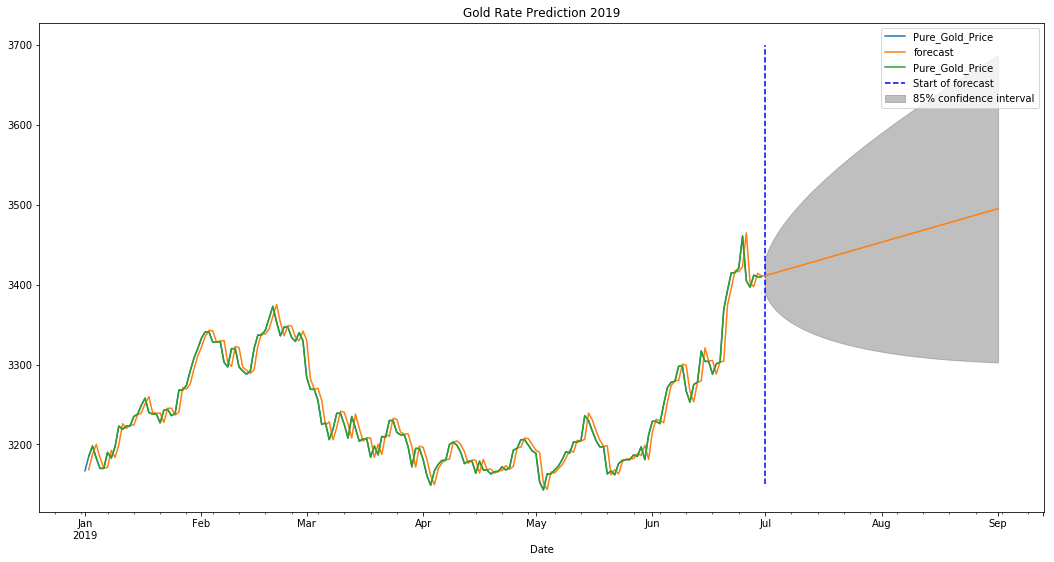

In [6]:
fig, ax = plt.subplots(figsize=(18, 9))
#df1.index = pd.to_datetime(df1.index, format="%Y-%m")
ax = df1["2019-01-01":"2019-06-30"].plot(ax=ax,title='Gold Rate Prediction 2019')
ax.vlines('2019-07', 3150, 3700, linestyle='--', color='b', label='Start of forecast');
model = ARIMA(df1, order=(1,1,0))
model_fit = model.fit()
model_fit.predict(start='2019-01', end='2019-06', exog=None, dynamic=False)
model_fit.plot_predict('2019-01','2019-09', dynamic=False, plot_insample=True,alpha=0.15,ax=ax)
model_fit

In [141]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.Pure_Gold_Price   No. Observations:                  180
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -751.678
Method:                       css-mle   S.D. of innovations             15.753
Date:                Thu, 31 Oct 2019   AIC                           1509.356
Time:                        11:59:50   BIC                           1518.935
Sample:                    01-02-2019   HQIC                          1513.240
                         - 06-30-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3560      1.257      1.079      0.282      -1.108       3.820
ar.L1.D.Pure_Gold_Price     0.0663      0.074      0.891      0.374      -0.080       0.212
